# IRIS Dataset
Processes selected samples from the [iris dataset](http://vcipl-okstate.org/pbvs/bench/Data/02/download.html) to fit the specifications of the sliding windows used in images from the FLIR thermal camera.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage import data
from skimage import io
from skimage.transform import resize
from skimage.color import rgb2gray
from scipy.misc import bytescale
%matplotlib inline

In [2]:
WINDOW_WIDTH = 18
WINDOW_HEIGHT = 26

In [3]:
sample_iris_frame = data.imread('external_data/iris/vivek/Expression/ex1/L-1074.bmp')

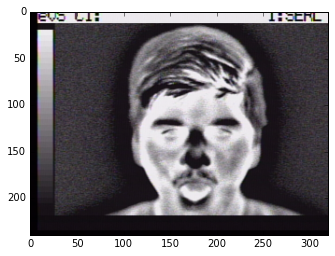

In [4]:
plt.imshow(sample_iris_frame)

In [5]:
saved_face_regions = np.load('face_regions.npy')

In [6]:
def load_saved_face_region(face_regions, w,h):
    for row in saved_face_regions:
        # some images may not exist after data cleaning
        if os.path.isfile(row[0]):
            img = data.imread(row[0])
            x = row[1][0]
            y = row[1][1]
            yield img[y:y+WINDOW_HEIGHT,x:x+WINDOW_WIDTH]

In [7]:
our_faces = list(load_saved_face_region(saved_face_regions, WINDOW_WIDTH, WINDOW_HEIGHT))

A reference image we gathered

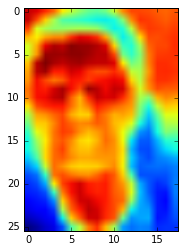

In [8]:
plt.imshow(our_faces[6])

# Process IRIS images

In [9]:
def crop(img, size, corner):
    y = corner[0]
    x = corner[1]
    h = size[0]
    w = size[1]
    return img[y:y+h, x:x+w]

In [10]:
# Values which specify how to crop IRIS images to fit sliding window
ROI_start_y = 13
ROI_start_x = 100
ROI_height = 207
ROI_scale = ROI_height / WINDOW_HEIGHT
ROI_width = int(np.floor(ROI_scale * WINDOW_WIDTH))

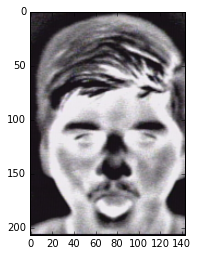

In [11]:
cropped_iris_sample = crop(sample_iris_frame, (ROI_height, ROI_width), (ROI_start_y, ROI_start_x))
plt.imshow(cropped_iris_sample)

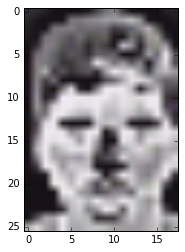

In [12]:
resized_sample = resize(cropped_iris_sample, (WINDOW_HEIGHT, WINDOW_WIDTH))
plt.imshow(resized_sample)

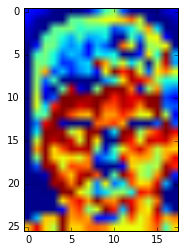

In [13]:
plt.imshow(bytescale(rgb2gray(resized_sample), cmin=0.0, cmax=1.0))

Putting it all together

In [14]:
def process_iris_sample(frame):
    global ROI_start_y, ROI_start_x, ROI_height, ROI_width
    cropped_frame = crop(frame, (ROI_height, ROI_width), (ROI_start_y, ROI_start_x))
    resized_frame = resize(cropped_frame, (WINDOW_HEIGHT, WINDOW_WIDTH))
    gray_frame = rgb2gray(resized_frame)
    return bytescale(gray_frame, cmin=0.0, cmax=1.0)

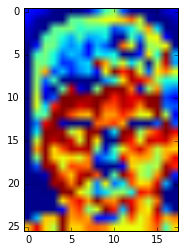

In [15]:
plt.imshow(process_iris_sample(sample_iris_frame))

# Review Cropping Performance

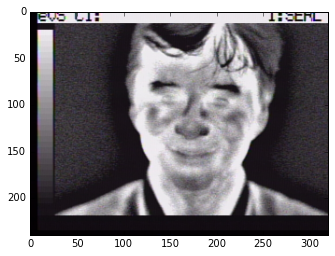

In [16]:
sample_2 = data.imread('external_data/iris/Gribok/Expression/ex2/L-1142.bmp')
plt.imshow(sample_2)

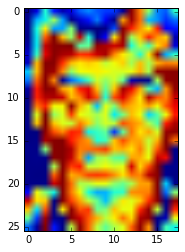

In [17]:
plt.imshow(process_iris_sample(sample_2))

# Load Selected IRIS dataset
Loads and processes images from IRIS dataset which have participant facing mostly toward camera and in the middle of the frame.

In [18]:
raw_iris = io.imread_collection('external_data/selected_iris/*.bmp')
len(raw_iris)

342

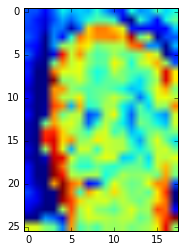

In [19]:
processed_iris = list(map(process_iris_sample, raw_iris))
plt.imshow(processed_iris[0])